<h2 style="font-weight: 700; text-align: center">Depth First Iterative Deepening (DFID) for Graph Node Search</h2>

#### Graph Reference

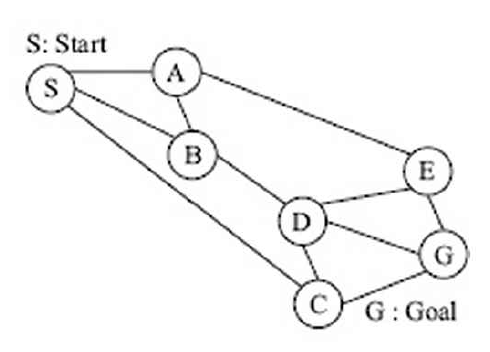

In [270]:
from IPython.display import Image, display
Image(filename="../../Graphs/Graph_1_ref.png", width=275, height=200)

#### Graph Representation

In [271]:

#~ An unweighed undirected graph represented as a hashmap/dictionary of Parent node and connected children
graph = { "S": ["A", "B", "C"],
          "A": ["B", "E", "S"],
          "B": ["A", "D", "S"],
          "C": ["D", "G", "S"],
          "D": ["B", "C", "E", "G"],
          "E": ["A", "D", "G"],
          "G": ["C", "D", "E"]
        }

<p style="font-size: 16px">Primary data structures (OPEN and CLOSED) will work on <i>Parent-child</i> pairs(tuples)</p>

In [272]:
def make_pair(to_, from_, level):
  return (to_, from_, level)

<p style="font-size: 16px"><b>MoveGen</b> -> Generates new nodes and moves the process of searching forward</p>

In [273]:
def dfid_move_gen(graph, curr_tup):
  new_nodes = [make_pair(new, curr_tup[0], curr_tup[-1] + 1) for new in graph[curr_tup[0]][::-1]]     
  return new_nodes

<p style="font-size: 16px"><b>Remove seen</b> -> Avoids repeat traversals and infinite looping (Simple Search 3's improvement upon SS2)</p>

###### Remove_seen checks *only* the *OPEN* list in DFID

In [274]:
def dfid_remove_seen(new_nodes, OPEN):
  cleansed = []
  OPEN_ = [n[0] for n in OPEN]        # only the children, not the whole pair 
  for node in new_nodes:
    if node[0] not in OPEN_:   # if and only if the new node is not already in OPEN and CLOSED, add it
      cleansed.append(node)
  return cleansed

<p style="font-size: 16px"><b>Reconstruct path</b> -> When Goal node is found, this functions returns the exact path taken to reach to it</p>

In [275]:
def reconstruct_path(OPEN, CLOSED):
  path = [OPEN.pop(0)]
  node = path[0]

  while node[1] != "NIL":
    for m in CLOSED:
      if node[1] == m[0] and m[-1] == node[-1] - 1:
        path.append(m)
        node = m
  return path

<p style="font-size: 16px"><b>Print path</b> -> Utility function to print the final path prettily</p>

In [276]:
def print_path(path):
  for node_ix in range(len(path)):
    if node_ix != len(path) - 1:
      print(f"\033[38;5;214m{path[node_ix][0]}", end="\033[38;5;207m -> \033[0m")
    else:  
      print(f"\033[38;5;214m{path[node_ix][0]}\033[0m")

<p style="font-size: 20px"><b>Core working function</b></p>

In [277]:
def graph_dfid(graph, start, goal, dl):
  for depth_lim in range(0, dl+1):
    OPEN = [make_pair(start, "NIL", 0)]   # Depth -> a semi-heuristic approach
    CLOSED = []
    while len(OPEN) != 0:
      # print("OPEN:", OPEN)
      if OPEN[0][0] == goal:
        print(f"\033[38;5;82mGoal found at depth {depth_lim}!\033[0m")
        print("Path from Source to Goal:", end=" ")
        print_path(reconstruct_path(OPEN, CLOSED)[::-1])
        return
      else:
        CLOSED.append(OPEN.pop(0))
        if CLOSED[-1][-1] < depth_lim:
          new_nodes = dfid_move_gen(graph, CLOSED[-1])
          # print("Genned nodes:", new_nodes)
          new_nodes = dfid_remove_seen(new_nodes, OPEN)
          # print("Genned nodes after remove_seen:", new_nodes)
          [(OPEN.insert(0, node)) for node in new_nodes if node[-1] <= depth_lim]        # Stack implementation of OPEN in DFS
    print(f"\033[38;5;197mGoal not found at depth {depth_lim}...\033[0m")

<p style="font-size: 20px">Function Calls</p>

<p style="font-size: 20px"><b>For the graph set above ↑</b></p>

<p style="font-size: 16px">Case 1: Simple <b>Start (S)</b> to <b>Goal (G)</b> searching</p>

In [278]:
graph_dfid(graph, "S", "G", 5)

Goal not found at depth 0...
Goal not found at depth 1...
Goal found at depth 2!
Path from Source to Goal: S -> C -> G


<p style="font-size: 16px">Case 2: Goal is not present</p>

In [279]:
graph_dfid(graph, "S", "L", 5)

Goal not found at depth 0...
Goal not found at depth 1...
Goal not found at depth 2...
Goal not found at depth 3...
Goal not found at depth 4...
Goal not found at depth 5...


<p style="font-size: 16px">Case 3: Begins with Goal itself</p>

In [280]:
graph_dfid(graph, "G", "G", 5)

Goal found at depth 0!
Path from Source to Goal: G


<p style="font-weight: 700; font-size: 20px">Graph 2 - Semi Directed</p>

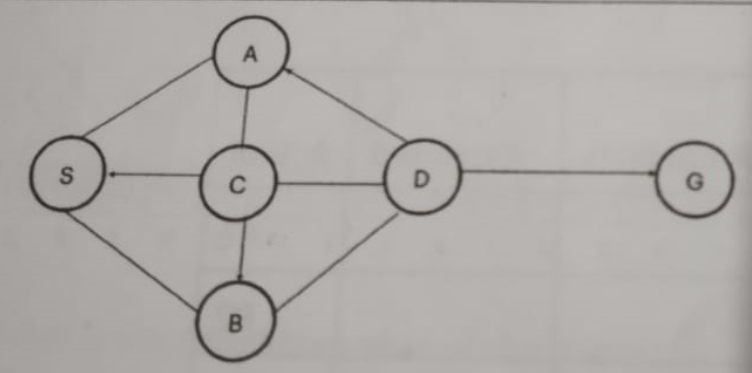

In [281]:
Image(filename="../../Graphs/Graph_2_ref.png", width=400, height=200)

In [282]:
graph = { "S": ["A", "B"],
          "A": ["C", "S"],
          "B": ["D", "S"],
          "C": ["A", "B", "D", "S"],
          "D": ["A", "B", "C", "G"],
          "G": []
        }

<p style="font-size: 16px">Case 1: Simple <b>Start (S)</b> to <b>Goal (G)</b> searching</p>

In [283]:
graph_dfid(graph, "S", "G", 5)

Goal not found at depth 0...
Goal not found at depth 1...
Goal not found at depth 2...
Goal found at depth 3!
Path from Source to Goal: S -> B -> D -> G


<p style="font-weight: 700; font-size: 20px">NPTEL - CLOSED list anomaly</p>

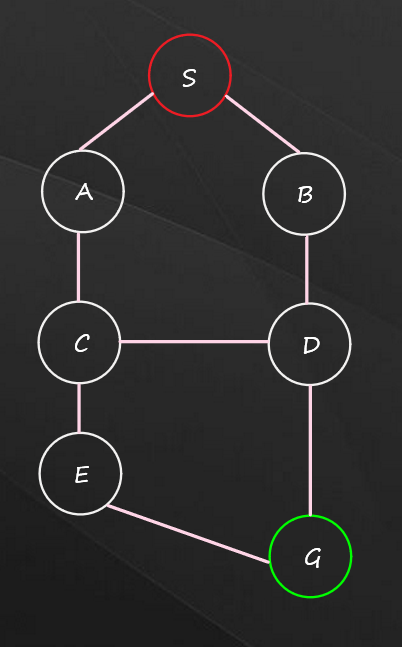

In [287]:
Image(filename="../../Graphs/Graph_3_ref.png")

In [285]:
graph = { "S": ["A", "B"],
          "A": ["C", "S"],
          "B": ["D", "S"],
          "C": ["A", "B", "D", "S"],
          "D": ["A", "B", "C", "G"],
          "G": []
        }

<p style="font-size: 16px">Case 1: Simple <b>Start (S)</b> to <b>Goal (G)</b> searching</p>

In [286]:
graph_dfid(graph, "S", "G", 5)

Goal not found at depth 0...
Goal not found at depth 1...
Goal not found at depth 2...
Goal found at depth 3!
Path from Source to Goal: S -> B -> D -> G
